# 2. Iris의 세 가지 품종, 분류해볼 수 있겠어요?

## 2-1. 들어가며

- scikit-learn에 내장되어 있는 예제 데이터셋의 종류를 알고 활용할 수 있다.
- scikit-learn에 내장되어 있는 분류 모델들을 학습시키고 예측해 볼 수 있다.
- 모델의 성능을 평가하는 지표의 종류에 대해 이해하고, 활용 및 확인해 볼 수 있다.
- Decision Tree, XGBoost, RandomForest, 로지스틱 회귀 모델을 활용해서 간단하게 학습 및 예측해 볼 수 있다.
- 데이터셋을 사용해서 스스로 분류 기초 실습을 진행할 수 있다.


## 2-2. Iris의 세 가지 품종, 분류해 볼까요? (1) 붓꽃 분류 문제
```
pip install scikit-learn    
pip install matplotlib
```

### (1) 붓꽃 분류, 어떤 데이터로 할 건데?

- [Scikit-learn 데이터셋](https://scikit-learn.org/stable/datasets.html)
- [Iris plants dataset](https://scikit-learn.org/stable/datasets/toy_dataset.html#iris-plants-dataset)

## 2-3. Iris의 세 가지 품종, 분류해 볼까요? (2) 데이터 준비, 그리고 자세히 살펴보기는 기본!

In [ ]:
from sklearn.datasets import load_iris

iris = load_iris()

print(dir(iris)) # dir()는 개체가 어떤 변수와 메서드를 가지고 있는지 나열한다

In [ ]:
# iris 객체에 어떤 정보들이 담겨져있는지 확인
iris.keys()

In [ ]:
print(iris.target_names) # target name

In [ ]:
print(iris.feature_names) # feature name

In [ ]:
iris_data = iris.data # iris data

print(iris_data.shape) # iris data shape

- 150개의 데이터가 각각 4개의 정보를 담고 있다.

In [ ]:
iris_data[0]

- 순서대로 `sepal length`, `sepal width`, `petal length`, `petal width` 를 나타낸다.
- 붓꽃의 꽃잎과 꽃받침 길이를 이용해 'setosa', 'versicolor', 'virginica' 세 가지 중 붗꽃의 종류가 무엇인지 알아내야 한다.

In [ ]:
iris_label = iris.target # 모델이 출력해야 하는 정답, 라벨(label), 타겟(target)

print(iris_label.shape)
iris_label

In [ ]:
iris.target_names

- 0, 1, 2 숫자는 각각 꽃 이름을 나타낸다.

In [ ]:
print(iris.DESCR)

- `DESCR`에는 데이터셋의 설명이 담겨져있다.
- Iris 데이터는 R.A. Fisher라는 사람의 논문에서 처음으로 활용되었다.

In [ ]:
# 각 feature에 대한 설명
iris.feature_names

In [ ]:
# 데이터셋 파일이 저장된 경로
iris.filename

## 2-4. 첫 번째 머신러닝 실습, 간단하고도 빠르게! (1) 머신러닝 모델을 학습시키기 위한 문제지와 정답지 준비

In [ ]:
import pandas as pd

print(pd.__version__)

In [ ]:
iris_df = pd.DataFrame(data=iris_data, columns=iris.feature_names)
iris_df

In [ ]:
# iris 데이터에 정답 데이터 추가
iris_df["label"] = iris.target
iris_df

In [ ]:
# train, test data 나누기
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(iris_data,
                                                    iris_label,
                                                    test_size=0.2,
                                                    random_state=7)

print(f'X_train 개수: {len(X_train)}, X_test 개수: {len(X_test)}')

In [ ]:
X_train.shape, y_train.shape

In [ ]:
X_test.shape, y_test.shape

In [ ]:
y_train, y_test

- 0, 1, 2가 무작위로 섞여 있는 것을 확인할 수 있는데 `train_test_split` 함수가 균일하게 잘 섞일 수 있도록 만들어냈다는 뜻이다.

## 2-5. 첫 번째 머신러닝 실습, 간단하고도 빠르게! (2) 첫 번째 머신러닝 모델 학습시키기

- 지도 학습(Supervised Learning)
    - 분류(Classification)
    - 회귀(Regression)
- 비지도 학습(Unsupervised Learning)

### 의사결정나무
- [의사결정나무(Decision Tree)](https://ratsgo.github.io/machine%20learning/2017/03/26/tree/)

결정 트리(Deicision Tree)의 단점은 결정 경계까 데이터 축에 수직이어서 특정 데이터에만 잘 작동할 수 있다는 문제가 있다. 이를 극복하기 위해 제안된 모델이 Random Forest이며, 여러 개의 Decision Tree를 합쳐서 만들어 놓은 개념이다.

In [ ]:
# 사이킷런의 decision tree
from sklearn.tree import DecisionTreeClassifier

decision_tree = DecisionTreeClassifier(random_state=32)
print(decision_tree._estimator_type)

In [ ]:
# 학습
decision_tree.fit(X_train, y_train)

## 2-6. 첫 번째 머신러닝 실습, 간단하고도 빠르게! (3) 첫 번째 머신러닝 모델 평가하기

In [ ]:
# 예측
y_pred = decision_tree.predict(X_test)
y_pred

In [ ]:
# 실제 값
y_test

In [ ]:
# 정확도
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test, y_pred)
accuracy

## 2-7. 첫 번째 머신러닝 실습, 간단하고도 빠르게! (4) 다른 모델도 해 보고 싶다면? 코드 한 줄만 바꾸면 돼!

In [ ]:
# (1) 필요한 모듈 import
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report

# (2) 데이터 준비
iris = load_iris()
iris_data = iris.data
iris_label = iris.target

# (3) train, test 데이터 분리
X_train, X_test, y_train, y_test = train_test_split(iris_data, 
                                                    iris_label, 
                                                    test_size=0.2, 
                                                    random_state=7)


### Decision Tree

In [ ]:
# (4) 모델 학습 및 예측
decision_tree = DecisionTreeClassifier(random_state=32)
decision_tree.fit(X_train, y_train)
y_pred = decision_tree.predict(X_test)

print(classification_report(y_test, y_pred))

### Random Forest
- [군중은 똑똑하다 — Random Forest](https://medium.com/@deepvalidation/title-3b0e263605de)

데이터 사이언스에서는 이렇게 의견을 통합하거나 여러가지 결과를 합치는 방식을 **“앙상블” (Ensemble method)**이라고 합니다.

**Random Forest**는 각각의 의사 결정 트리를 만드는데 있어 쓰이는 요소들 (흡연 여부, 나이, 등등)을 무작위적으로 선정합니다. 건강 위험도를 30개의 요소로 설명할 수 있으면, 의사 결정 트리의 한 단계를 생성하면서 모든 요소들을 고려하지 않습니다. 30개 중 무작위로 일부만 선택하여, 그 선택된 일부 중 가장 건강 위험도를 알맞게 예측하는 한 가지 요소가 의사 결정 트리의 한 단계가 됩니다.

In [ ]:
# Random Forest
from sklearn.ensemble import RandomForestClassifier

random_forest = RandomForestClassifier(random_state=32)
random_forest.fit(X_train, y_train)
y_pred = random_forest.predict(X_test)

print(classification_report(y_test, y_pred))

### Support Vector Machine (SVM)

- [Support Vector Machine (SVM, 서포트 벡터 머신)](https://excelsior-cjh.tistory.com/66?category=918734)
- [서포트 벡터 머신(Support Vector Machine) 쉽게 이해하기](http://hleecaster.com/ml-svm-concept/)

**Support Vector Machine**
- SVM은 분류에 사용되는 지도학습 머신러닝 모델이다.
- SVM은 서포트 벡터(support vectors)를 사용해서 결정 경계(Decision Boundary)를 정의하고, 분류되지 않은 점을 해당 결정 경계와 비교해서 분류한다.
- 서포트 벡터(support vectors)는 결정 경계에 가장 가까운 각 클래스의 점들이다.
- 서포트 벡터와 결정 경계 사이의 거리를 마진(margin)이라고 한다.
- SVM은 허용 가능한 오류 범위 내에서 가능한 최대 마진을 만들려고 한다.
- 파라미터 C는 허용되는 오류 양을 조절한다. C 값이 클수록 오류를 덜 허용하며 이를 하드 마진(hard margin)이라 부른다. 반대로 C 값이 작을수록 오류를 더 많이 허용해서 소프트 마진(soft margin)을 만든다.
- SVM에서는 선형으로 분리할 수 없는 점들을 분류하기 위해 커널(kernel)을 사용한다.
- 커널(kernel)은 원래 가지고 있는 데이터를 더 높은 차원의 데이터로 변환한다. 2차원의 점으로 나타낼 수 있는 데이터를 다항식(polynomial) 커널은 3차원으로, RBF 커널은 점을 무한한 차원으로 변환한다.
- RBF 커널에는 파라미터 감마(gamma)가 있다. 감마가 너무 크면 학습 데이터에 너무 의존해서 오버피팅이 발생할 수 있다.


In [ ]:
from sklearn import svm

svm_model = svm.SVC()

svm_model.fit(X_train, y_train)
y_pred = svm_model.predict(X_test)

print(classification_report(y_test, y_pred))

### Stochastic Gradient Descent Classifier (SGDClassifier)

- [사이킷런 공식문서-Stochastic Gradient Descent Classifier](https://scikit-learn.org/stable/modules/sgd.html)
- [확률적 경사하강법](https://needjarvis.tistory.com/686)
- [Andrew Ng - 확률적 경사하강법](https://brunch.co.kr/@linecard/560)

In [ ]:
from sklearn.linear_model import SGDClassifier

sgd_model = SGDClassifier()
sgd_model.fit(X_train, y_train)
y_pred = svm_model.predict(X_test)

print(classification_report(y_test, y_pred))

### Logistic Regression
- [로지스틱회귀(Logistic Regression) 쉽게 이해하기](http://hleecaster.com/ml-logistic-regression-concept/)

In [ ]:
from sklearn.linear_model import LogisticRegression

LogisticRegression = LogisticRegression(max_iter=100)

LogisticRegression.fit(X_train, y_train)
y_pred = LogisticRegression.predict(X_test)

print(classification_report(y_test, y_pred))

### 2-8. 내 모델은 얼마나 똑똑한가? 다양하게 평가해 보기 (1) 정확도에는 함정이 있다

### 정확도에는 함정이 있다

In [ ]:
from sklearn.datasets import load_digits

digits = load_digits() # 손글씨 데이터
digits.keys()

In [ ]:
digits_data = digits.data
digits_data.shape

In [ ]:
digits_data[0] # 첫 번째 데이터

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.imshow(digits.data[0].reshape(8, 8), cmap='gray')
plt.axis('off')
plt.show()

In [ ]:
for i in range(10):
    plt.subplot(2, 5, i+1)
    plt.imshow(digits.data[i].reshape(8, 8), cmap='gray')
    plt.axis('off')
plt.show()

In [ ]:
digits_label = digits.target
print(digits_label.shape)
digits_label[:20]

**정확도의 함정**을 확인하시 위한 실험을 위해 숫자 10개를 모두 분류하는 것이 아닌, 해당 이미지 데이터가 3인지 아닌지를 맞추는 문제로 변형해본다.

In [ ]:
new_label = [3 if i == 3 else 0 for i in digits_label]
new_label[:20]

In [ ]:
from sklearn.metrics import accuracy_score

# train, test 데이터 분리
X_train, X_test, y_train, y_test = train_test_split(digits_data, 
                                                    new_label, 
                                                    test_size=0.2, 
                                                    random_state=7)

                                                
dt = DecisionTreeClassifier()

dt.fit(X_train, y_train)
y_pred = dt.predict(X_test)

# print(classification_report(y_test, y_pred))
accuracy = accuracy_score(y_test, y_pred)
accuracy

- 모델이 전혀 학습을 하지 않고 정답을 모두 0으로만 선택해도 정확도가 90%가 나오게 되는 것이다.

In [ ]:
fake_pred = [0] * len(y_pred)

accuracy = accuracy_score(y_test, fake_pred)
accuracy

- 답을 0으로만 찍어도 정확도가 90%가 넘게 나온다.

## 2-9. 내 모델은 얼마나 똑똑한가? 다양하게 평가해 보기 (2) 정답과 오답에도 종류가 있다!

정확도는 전체 데이터 중 맞은 데이터만 신경쓰는 척도이다. 
얼마나 많은 양성데이터를 맞았느냐도 중요하지만, 음성 데이터를 얼마나 안 틀렸느냐도 중요한 경우도 있다.

코로나 바이러스가 의심되는 환자를 코로나가 안 걸렸는데 걸렸다고 진단하면 환자에게는 다행이지만 반대로 걸렸는데 걸리지 않았다고 오진하면 환자에게 치명적일 수 있다.

정답과 오답을 구분하여 표현하는 방법을 **오차행렬(confusion matrix)**라 한다.
- [What is Confusion Matrix and Advanced Classification Metrics?](https://manisha-sirsat.blogspot.com/2019/04/confusion-matrix.html)

오차 행렬에서는 예측 결과를 네 가지로 구분한다.
- TN(True Negative)
- FP(False Positive)
- FN(False Negative)
- TP(True Positive)

오차행렬에서 나타나는 성능 지표
- Precision
- Negative Predictive Value
- Sensitivity
- Specificity
- Accuracy

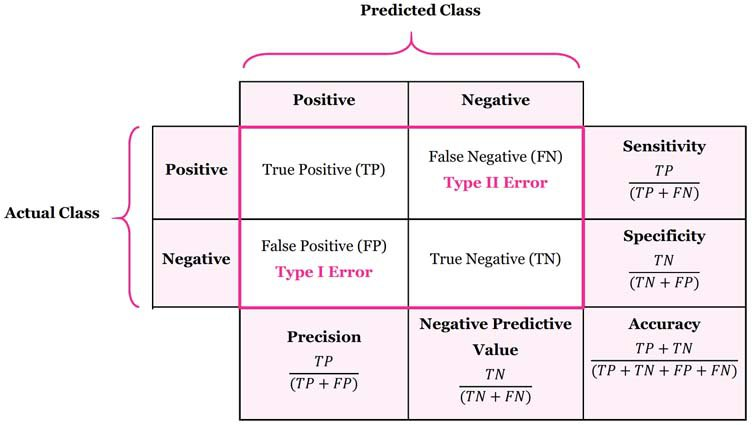

위 그림에서 각 행은 실제 클래스(Acutual Class)를 나타낸다. 코로나 환자로 예를 들면 Actual Class가 Positive라면 환자는 실제로 코로나에 걸린 것이다. 반대로 Acutual Class가 Negative라면 환자는 건강하다.


각 열은 예측된 클래스(Predicted Class)이다. Predicted Class가 Positive라면 진단 결과가 양성이고, Negative라면 진단 결과가 음성인 것을 말한다.

- TP(True Positive): 실제 환자에게 양성판정 (참 양성)
- FN(False Negative): 실제 환자에게 음성판정 (거짓 음성)
- FP(False Positive): 건강한 사람에게 양성판정 (거짓 양성)
- TN(True Negtative): 건강한 사람에게 음성판정 (참 음성)

TP, FN, FP, TN의 수치로 계산되는 성능 지표 중 대표적으로 사용되는 것이 **정밀도(Precision), 재현율(Recall, Sensitivity), F1 스코어(F1 Score)**이다.

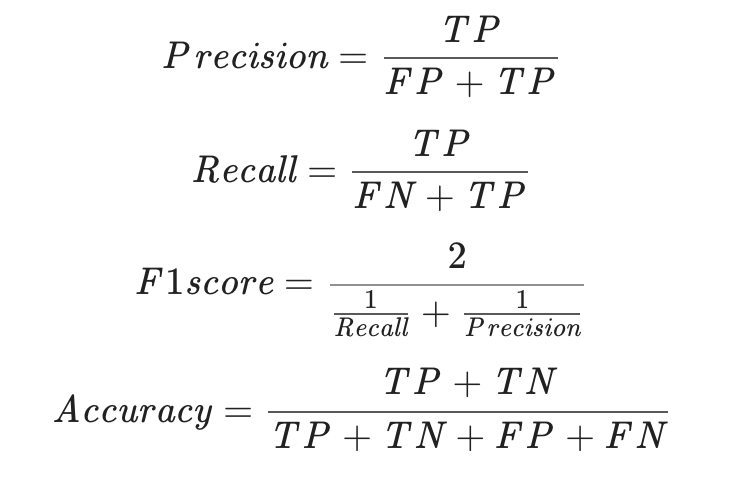

Precision과 Recall은 분자가 둘 다 $TP$이다. $TP$는 맞게 판단한 양성이므로 이 값은 높을 수록 좋다. 하지만 분모에 각각 $FP$와 $FN$이 있다. 이 값들은 잘못 판단된 것들이므로 낮을 수록 좋다.

즉, $TP$는 높고 $FP$ 또는 $FN$이 낮을수록 좋은 예측이므로, Precision과 Recall 값이 클 수록 좋다. 

Precision은 분모에 있는 $FP$가 낮을 수록 커진다. Precision을 높이려면 False Positive, 즉 음성인데 양성으로 판단하는 경우가 적어야 한다.

Recall은 분모에 있는 $FN$이 낮을수록 커진다. Recall이 높아지려면 False Negative 즉 양성인데 음성으로 판단하는 경우가 적어야 한다.

메일 처리 모델은 스펨 메일을 못 거르는 것은 괜찮지만, 정상 메일을 스팸 메일을 스팸 메일로 분류하는 것은 더 큰 문제이다. 즉, 음성을 양성으로 판단하면 안된다. 따라서 Precision이 더 중요하다.

암을 진단하는 경우 실제 환자를 한 명이라도 놓치면 안된다. 즉, 양성을 음성으로 판단하면 안 되기 때문에 Recall이 더 중요하다.

In [ ]:
# 오차 행렬
from sklearn.metrics import confusion_matrix

confusion_matrix(y_test, y_pred)

In [ ]:
# fake pred의 confusion matrix
confusion_matrix(y_test, fake_pred)

In [ ]:
# classification report
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

In [ ]:
# fake_pred
print(classification_report(y_test, fake_pred))

In [ ]:
accuracy_score(y_test, y_pred), accuracy_score(y_test, fake_pred)